<a href="https://colab.research.google.com/github/blantj/tensorflow_colab_tutorial/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following along https://www.youtube.com/watch?v=k1GIEkzQ8qc&t=201s PyTorch  tutorial.  Code executed in Google colab

Import fastai library

In [22]:
!pip install -Uqq fastai
from fastai.vision.all import * 

Check url of fastai built in FOOD dataset

In [23]:
URLs.FOOD

'https://s3.amazonaws.com/fast-ai-imageclas/food-101.tgz'

Save FOOD dataset to foodPath variable

In [24]:
foodPath = untar_data(URLs.FOOD)

Check path FOOD dataset saved to

In [26]:
 foodPath

Path('/root/.fastai/data/food-101')

View files in FOOD *dataset*

In [27]:
get_files(foodPath)

(#101017) [Path('/root/.fastai/data/food-101/train.txt'),Path('/root/.fastai/data/food-101/test.json'),Path('/root/.fastai/data/food-101/labels.txt'),Path('/root/.fastai/data/food-101/classes.txt'),Path('/root/.fastai/data/food-101/test.txt'),Path('/root/.fastai/data/food-101/train.json'),Path('/root/.fastai/data/food-101/images/fried_rice/1273265.jpg'),Path('/root/.fastai/data/food-101/images/fried_rice/1087868.jpg'),Path('/root/.fastai/data/food-101/images/fried_rice/3688257.jpg'),Path('/root/.fastai/data/food-101/images/fried_rice/259723.jpg')...]

View only image files in FOOD dataset

In [28]:
get_image_files(foodPath)

(#101000) [Path('/root/.fastai/data/food-101/images/fried_rice/1273265.jpg'),Path('/root/.fastai/data/food-101/images/fried_rice/1087868.jpg'),Path('/root/.fastai/data/food-101/images/fried_rice/3688257.jpg'),Path('/root/.fastai/data/food-101/images/fried_rice/259723.jpg'),Path('/root/.fastai/data/food-101/images/fried_rice/797293.jpg'),Path('/root/.fastai/data/food-101/images/fried_rice/3542359.jpg'),Path('/root/.fastai/data/food-101/images/fried_rice/3469839.jpg'),Path('/root/.fastai/data/food-101/images/fried_rice/422153.jpg'),Path('/root/.fastai/data/food-101/images/fried_rice/976910.jpg'),Path('/root/.fastai/data/food-101/images/fried_rice/2523524.jpg')...]

View sample image from dataset

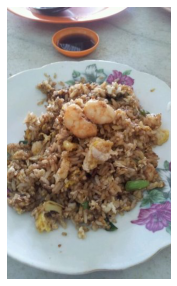

In [29]:
img = PILImage.create(get_image_files(foodPath)[0])
img.show()

Count number of images in dataset

In [30]:
len(get_image_files(foodPath))

101000

View all class labels in dataset

In [31]:
df = pd.read_json('/root/.fastai/data/food-101/test.json')
num = 0
while num < len(df.columns):
  print(list(df.columns[num:num+10]))
  num+=10
df

['churros', 'hot_and_sour_soup', 'samosa', 'sashimi', 'pork_chop', 'spring_rolls', 'panna_cotta', 'beef_tartare', 'greek_salad', 'foie_gras']
['tacos', 'pad_thai', 'poutine', 'ramen', 'pulled_pork_sandwich', 'bibimbap', 'beignets', 'apple_pie', 'crab_cakes', 'risotto']
['paella', 'steak', 'baby_back_ribs', 'miso_soup', 'frozen_yogurt', 'club_sandwich', 'carrot_cake', 'falafel', 'bread_pudding', 'chicken_wings']
['gnocchi', 'caprese_salad', 'creme_brulee', 'escargots', 'chocolate_cake', 'tiramisu', 'spaghetti_bolognese', 'mussels', 'scallops', 'baklava']
['edamame', 'macaroni_and_cheese', 'pancakes', 'garlic_bread', 'beet_salad', 'onion_rings', 'red_velvet_cake', 'grilled_salmon', 'chicken_curry', 'deviled_eggs']
['caesar_salad', 'hummus', 'fish_and_chips', 'lasagna', 'peking_duck', 'guacamole', 'strawberry_shortcake', 'clam_chowder', 'croque_madame', 'french_onion_soup']
['beef_carpaccio', 'fried_rice', 'donuts', 'gyoza', 'ravioli', 'fried_calamari', 'spaghetti_carbonara', 'french_toas

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,tacos,pad_thai,poutine,ramen,pulled_pork_sandwich,bibimbap,beignets,apple_pie,crab_cakes,risotto,paella,steak,baby_back_ribs,miso_soup,frozen_yogurt,club_sandwich,carrot_cake,falafel,bread_pudding,chicken_wings,gnocchi,caprese_salad,creme_brulee,escargots,chocolate_cake,tiramisu,spaghetti_bolognese,mussels,scallops,baklava,...,fried_rice,donuts,gyoza,ravioli,fried_calamari,spaghetti_carbonara,french_toast,lobster_bisque,ceviche,bruschetta,french_fries,shrimp_and_grits,filet_mignon,hamburger,dumplings,tuna_tartare,sushi,cheese_plate,eggs_benedict,cup_cakes,takoyaki,chocolate_mousse,breakfast_burrito,hot_dog,macarons,waffles,seaweed_salad,cannoli,huevos_rancheros,pizza,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1061830,hot_and_sour_soup/1000486,samosa/1009326,sashimi/100113,pork_chop/1012227,spring_rolls/1005480,panna_cotta/1006650,beef_tartare/101073,greek_salad/1010850,foie_gras/1007306,tacos/1023947,pad_thai/1081901,poutine/1000631,ramen/1000325,pulled_pork_sandwich/1027491,bibimbap/1001113,beignets/1002850,apple_pie/1011328,crab_cakes/1003337,risotto/1004935,paella/1019711,steak/100274,baby_back_ribs/1005066,miso_soup/1014272,frozen_yogurt/1012504,club_sandwich/1018254,carrot_cake/1006961,falafel/102356,bread_pudding/1005036,chicken_wings/1010547,gnocchi/1005096,caprese_salad/1012384,creme_brulee/1007951,escargots/1007283,chocolate_cake/1033790,tiramisu/1009109,spaghetti_bolognese/1027299,mussels/1009170,scallops/100757,baklava/1028777,...,fried_rice/1023430,donuts/1006079,gyoza/1009005,ravioli/100904,fried_calamari/1007131,spaghetti_carbonara/1003992,french_toast/100864,lobster_bisque/1003421,ceviche/102574,bruschetta/1013211,french_fries/1008163,shrimp_and_grits/1011384,filet_mignon/1023857,hamburger/1010136,dumplings/1016850,tuna_tartare/1008604,sushi/101625,cheese_plate/1011471,eggs_benedict/1013425,cup_cakes/1003128,takoyaki/1002013,chocolate_mousse/1002682,breakfast_burrito/1000920,hot_dog/103364,macarons/1005656,waffles/1005755,seaweed_salad/1004774,cannoli/1087676,huevos_rancheros/1010595,pizza/1001116,chicken_quesadilla/10257,pho/1002382,prime_rib/1006976,cheesecake/1023543,ice_cream/1004744,omelette/1019294,grilled_cheese_sandwich/1000938,lobster_roll_sandwich/1002698,nachos/1011831,oysters/1005672
1,churros/1064042,hot_and_sour_soup/1004564,samosa/1024186,sashimi/1017182,pork_chop/1019077,spring_rolls/103010,panna_cotta/1027460,beef_tartare/1029120,greek_salad/1029680,foie_gras/1044237,tacos/1026681,pad_thai/1097554,poutine/1008948,ramen/1006057,pulled_pork_sandwich/103159,bibimbap/1004374,beignets/1017820,apple_pie/101251,crab_cakes/1005068,risotto/1035813,paella/1026685,steak/1012080,baby_back_ribs/1022479,miso_soup/1023581,frozen_yogurt/1068965,club_sandwich/1029932,carrot_cake/1007814,falafel/102549,bread_pudding/1042213,chicken_wings/1022035,gnocchi/1006467,caprese_salad/1020090,creme_brulee/1008540,escargots/1020422,chocolate_cake/1043216,tiramisu/1016527,spaghetti_bolognese/1043568,mussels/1032631,scallops/100959,baklava/1029051,...,fried_rice/1028159,donuts/1007399,gyoza/1026798,ravioli/1027063,fried_calamari/1016491,spaghetti_carbonara/10053,french_toast/1008722,lobster_bisque/1008682,ceviche/1030519,bruschetta/1018048,french_fries/1033213,shrimp_and_grits/1017959,filet_mignon/103497,hamburger/1031616,dumplings/1032706,tuna_tartare/101560,sushi/1016390,cheese_plate/101176,eggs_benedict/1039716,cup_cakes/1008028,takoyaki/1010258,chocolate_mousse/1008451,breakfast_burrito/1015606,hot_dog/10464,macarons/1027142,waffles/102624,seaweed_salad/1008972,cannoli/109727,huevos_rancheros/1017765,pizza/1032754,chicken_quesadilla/1030292,pho/1020153,prime_rib/102197,cheesecake/102854,ice_cream/1031536,omelette/1058816,grilled_cheese_sandwich/1003050,lobster_roll_sandwich/1029665,nachos/101954,oysters/1017801
2,churros/1

Select 2 classes to classify for simplicity

In [32]:
labelA = 'samosa'
labelB = 'churros'

Remove images not in class A or class B and rename remaining images to include class in name

In [33]:
for img in get_image_files(foodPath):    
  if labelA in str(img):
    img.rename(f"{img.parent}/{labelA}-{img.name}")
  elif labelB in str(img):
    img.rename(f"{img.parent}/{labelB}-{img.name}")
  else: os.remove(img)

len(get_image_files(foodPath))

2000

Define function to get image label

In [34]:
def GetLabel(fileName):
  return fileName.split('-')[0]

Generate image data

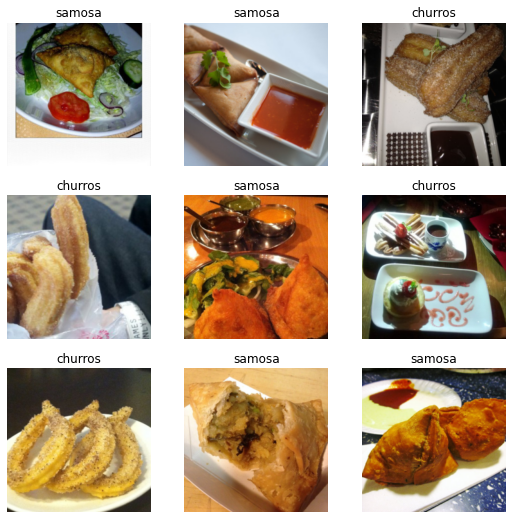

In [36]:
dls = ImageDataLoaders.from_name_func(
    foodPath, get_image_files(foodPath), valid_pct=0.2, seed=420,
    label_func=GetLabel, item_tfms=Resize(224))

dls.train.show_batch()

Train model

In [37]:
learn = cnn_learner(dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=10)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.643521,0.093880,0.027500,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.147364,0.096547,0.025000,00:14
1,0.085607,0.091747,0.025000,00:14
2,0.054449,0.108303,0.020000,00:14
3,0.034596,0.102309,0.025000,00:14
4,0.027082,0.098412,0.020000,00:14
5,0.020997,0.112466,0.020000,00:14
6,0.018468,0.102654,0.020000,00:14
7,0.018795,0.084877,0.020000,00:14
8,0.012424,0.067465,0.015000,00:14
9,0.008294,0.066139,0.012500,00:14


  Test model on sample images in dataset

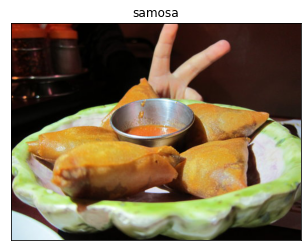

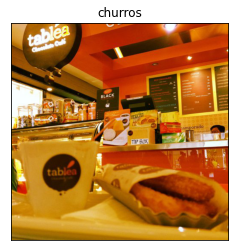

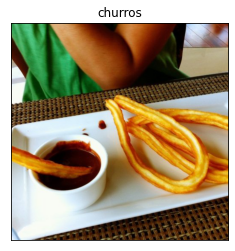

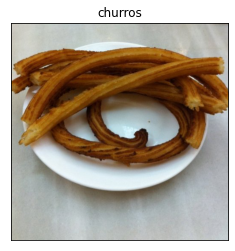

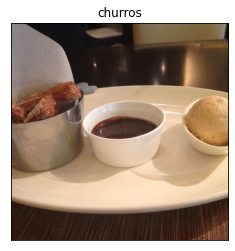

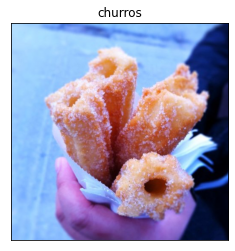

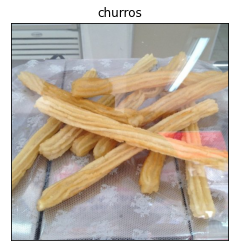

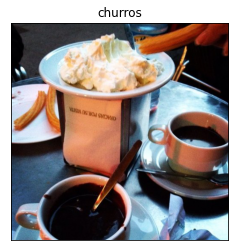

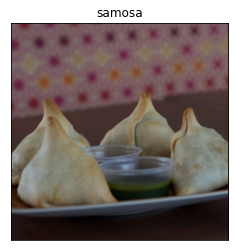

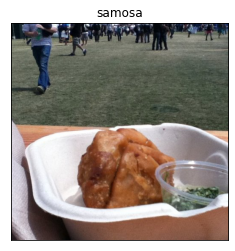

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0,10):
  #Load random image
  randomIndex = random.randint(0, len(get_image_files(foodPath))-1)
  img = mpimg.imread(get_image_files(foodPath)[randomIndex])
  #Put into Model
  label,_,probs = learn.predict(img)

  #Create Figure using Matplotlib
  fig = plt.figure()
  ax = fig.add_subplot() #Add Subplot (For multiple images)
  imgplot = plt.imshow(img) #Add Image into Plot
  ax.set_title(label) #Set Headline to predicted label

  #Hide numbers on axes
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)

Print confusion matrix of classifications

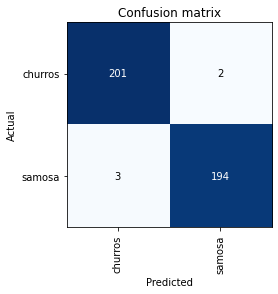

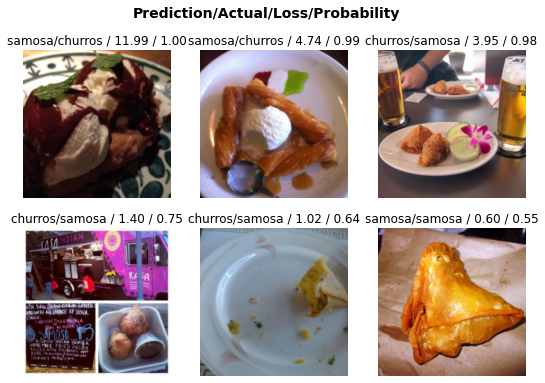

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(6)